In [2]:
import pandas as pd 
import numpy as np 

In [ ]:
# 数据集介绍
#商品特征 id、 类目、 统计类特征； 用户-商品交叉特征；少量用户特征 
## 商品特征  
### [skuid,class_name,c_price,line_price,goods_class_id,goods_class_name,
### goods_7day_views,goods_14day_views,goods_30day_views,goods_7day_sales,goods_14day_sales,goods_30day_sales,
### goods_7day_deal_rate,goods_14day_deal_rate,goods_30day_deal_rate,
### goods_7day_sales_rate,goods_14day_sales_rate,goods_30day_sales_rate,
### goods_7day_clk_rate,goods_14day_clk_rate,goods_30day_clk_rate,
### class_type_7day_clk_rate,class_type_14day_clk_rate,class_type_30day_clk_rate,
### class_type_7day_deal_rate,class_type_14day_deal_rate,class_type_30day_deal_rate] 
### class_type_30day_deal_rate] 

##用户特征
###[mobile,prov_code]

##用户行为序列
###浏览行为序列
###点击行为序列
###购买行为序列

# 用户行为序列样例
# [{"sku_id":"1831552325","oper_time":"20241201","is_add_buy":"1","frist_order_type":"速溶咖啡","second_order_type":"速溶咖啡"},
#  {"sku_id":"1831555345","oper_time":"20241201","is_add_buy":"0","frist_order_type":"食品","second_order_type":"速溶咖啡"},
#  {"sku_id":"1831553365","oper_time":"20241202","is_add_buy":"1","frist_order_type":"豆腐干","second_order_type":"豆腐干"},
#  ......
#  ]

In [14]:
# # 样例数据准备
# 生成10条样例数据
data = pd.DataFrame({
    # 商品特征
    'skuid': ['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010'],
    'class_name': ['食品', '饮料', '零食', '食品', '饮料', '零食', '食品', '饮料', '零食', '食品'],
    'c_price': [15.9, 25.5, 12.8, 18.5, 22.0, 9.9, 16.5, 28.0, 11.5, 19.9],
    'line_price': [19.9, 29.9, 15.9, 22.9, 25.9, 12.9, 19.9, 32.9, 14.9, 23.9],
    'goods_class_id': ['A001', 'B001', 'C001', 'A002', 'B002', 'C002', 'A003', 'B003', 'C003', 'A004'],
    'goods_class_name': ['速溶咖啡', '果汁', '薯片', '豆腐干', '茶饮', '糖果', '方便面', '碳酸饮料', '饼干', '肉脯'],
    
    # 商品统计特征
    'goods_7day_views': [120, 85, 95, 150, 110, 75, 130, 90, 100, 140],
    'goods_14day_views': [250, 180, 200, 310, 230, 160, 270, 190, 210, 290],
    'goods_30day_views': [520, 380, 420, 650, 480, 340, 560, 400, 440, 600],
    'goods_7day_sales': [45, 30, 35, 55, 40, 25, 48, 32, 38, 50],
    'goods_14day_sales': [95, 65, 75, 115, 85, 55, 100, 70, 80, 105],
    'goods_30day_sales': [200, 140, 160, 240, 180, 120, 210, 150, 170, 220],
    
    # 用户特征
    'mobile': ['user001', 'user002', 'user003', 'user004', 'user005', 'user006', 'user007', 'user008', 'user009', 'user010'],
    'prov_code': ['110000', '310000', '440000', '330000', '510000', '420000', '320000', '370000', '610000', '500000'],
    
    # 用户行为序列（示例）
    'user_view_seq': [
        '[{"sku_id":"1001","oper_time":"20241201","is_add_buy":"1","frist_order_type":"食品","second_order_type":"速溶咖啡"}]',
        '[{"sku_id":"1002","oper_time":"20241201","is_add_buy":"0","frist_order_type":"饮料","second_order_type":"果汁"}]',
        '[{"sku_id":"1003","oper_time":"20241202","is_add_buy":"1","frist_order_type":"零食","second_order_type":"薯片"}]',
        '[{"sku_id":"1004","oper_time":"20241202","is_add_buy":"0","frist_order_type":"食品","second_order_type":"豆腐干"}]',
        '[{"sku_id":"1005","oper_time":"20241203","is_add_buy":"1","frist_order_type":"饮料","second_order_type":"茶饮"}]',
        '[{"sku_id":"1006","oper_time":"20241203","is_add_buy":"0","frist_order_type":"零食","second_order_type":"糖果"}]',
        '[{"sku_id":"1007","oper_time":"20241204","is_add_buy":"1","frist_order_type":"食品","second_order_type":"方便面"}]',
        '[{"sku_id":"1008","oper_time":"20241204","is_add_buy":"0","frist_order_type":"饮料","second_order_type":"碳酸饮料"}]',
        '[{"sku_id":"1009","oper_time":"20241205","is_add_buy":"1","frist_order_type":"零食","second_order_type":"饼干"}]',
        '[{"sku_id":"1010","oper_time":"20241205","is_add_buy":"0","frist_order_type":"食品","second_order_type":"肉脯"}]'
    ],
    
    'user_clk_seq': [
        '[{"sku_id":"1001","oper_time":"20241201","is_add_buy":"1","frist_order_type":"食品","second_order_type":"速溶咖啡"}]',
        '[{"sku_id":"1002","oper_time":"20241201","is_add_buy":"0","frist_order_type":"饮料","second_order_type":"果汁"}]',
        '[{"sku_id":"1003","oper_time":"20241202","is_add_buy":"1","frist_order_type":"零食","second_order_type":"薯片"}]',
        '[{"sku_id":"1004","oper_time":"20241202","is_add_buy":"0","frist_order_type":"食品","second_order_type":"豆腐干"}]',
        '[{"sku_id":"1005","oper_time":"20241203","is_add_buy":"1","frist_order_type":"饮料","second_order_type":"茶饮"}]',
        '[{"sku_id":"1006","oper_time":"20241203","is_add_buy":"0","frist_order_type":"零食","second_order_type":"糖果"}]',
        '[{"sku_id":"1007","oper_time":"20241204","is_add_buy":"1","frist_order_type":"食品","second_order_type":"方便面"}]',
        '[{"sku_id":"1008","oper_time":"20241204","is_add_buy":"0","frist_order_type":"饮料","second_order_type":"碳酸饮料"}]',
        '[{"sku_id":"1009","oper_time":"20241205","is_add_buy":"1","frist_order_type":"零食","second_order_type":"饼干"}]',
        '[{"sku_id":"1010","oper_time":"20241205","is_add_buy":"0","frist_order_type":"食品","second_order_type":"肉脯"}]'
    ],
    
    'user_purchase_seq': [
        '[{"sku_id":"1001","oper_time":"20241201","is_add_buy":"1","frist_order_type":"食品","second_order_type":"速溶咖啡"}]',
        '[{"sku_id":"1002","oper_time":"20241201","is_add_buy":"0","frist_order_type":"饮料","second_order_type":"果汁"}]',
        '[{"sku_id":"1003","oper_time":"20241202","is_add_buy":"1","frist_order_type":"零食","second_order_type":"薯片"}]',
        '[{"sku_id":"1004","oper_time":"20241202","is_add_buy":"0","frist_order_type":"食品","second_order_type":"豆腐干"}]',
        '[{"sku_id":"1005","oper_time":"20241203","is_add_buy":"1","frist_order_type":"饮料","second_order_type":"茶饮"}]',
        '[{"sku_id":"1006","oper_time":"20241203","is_add_buy":"0","frist_order_type":"零食","second_order_type":"糖果"}]',
        '[{"sku_id":"1007","oper_time":"20241204","is_add_buy":"1","frist_order_type":"食品","second_order_type":"方便面"}]',
        '[{"sku_id":"1008","oper_time":"20241204","is_add_buy":"0","frist_order_type":"饮料","second_order_type":"碳酸饮料"}]',
        '[{"sku_id":"1009","oper_time":"20241205","is_add_buy":"1","frist_order_type":"零食","second_order_type":"饼干"}]',
        '[{"sku_id":"1010","oper_time":"20241205","is_add_buy":"0","frist_order_type":"食品","second_order_type":"肉脯"}]'
    ]
})

print("样例数据生成完成，数据形状:", data.shape)

样例数据生成完成，数据形状: (10, 17)


In [15]:
data.head()

,skuid,class_name,c_price,line_price,goods_class_id,goods_class_name,goods_7day_views,goods_14day_views,goods_30day_views,goods_7day_sales,goods_14day_sales,goods_30day_sales,mobile,prov_code,user_view_seq,user_clk_seq,user_purchase_seq
0,1001,食品,15.9,19.9,A001,速溶咖啡,120,250,520,45,95,200,user001,110000,"[{""sku_id"":""1001"",""oper_time"":""20241201"",""is_a...","[{""sku_id"":""1001"",""oper_time"":""20241201"",""is_a...","[{""sku_id"":""1001"",""oper_time"":""20241201"",""is_a..."
1,1002,饮料,25.5,29.9,B001,果汁,85,180,380,30,65,140,user002,310000,"[{""sku_id"":""1002"",""oper_time"":""20241201"",""is_a...","[{""sku_id"":""1002"",""oper_time"":""20241201"",""is_a...","[{""sku_id"":""1002"",""oper_time"":""20241201"",""is_a..."
2,1003,零食,12.8,15.9,C001,薯片,95,200,420,35,75,160,user003,440000,"[{""sku_id"":""1003"",""oper_time"":""20241202"",""is_a...","[{""sku_id"":""1003"",""oper_time"":""20241202"",""is_a...","[{""sku_id"":""1003"",""oper_time"":""20241202"",""is_a..."
3,1004,食品,18.5,22.9,A002,豆腐干,150,310,650,55,115,240,user004,330000,"[{""sku_id"":""1004"",""oper_time"":""20241202"",""is_a...","[{""sku_id"":""1004"",""oper_time"":""20241202"",""is_a...","[{""sku_id"":""1004"",""oper_time"":""20241202"",""is_a..."
4,1005,饮料,22.0,25.9,B002,茶饮,110,230,480,40,85,180,user005,510000,"[{""sku_id"":""1005"",""oper_time"":""20241203"",""is_a...","[{""sku_id"":""1005"",""oper_time"":""20241203"",""is_a...","[{""sku_id"":""1005"",""oper_time"":""20241203"",""is_a..."


In [ ]:

# # 用户对商品id	用户历史点击次数  7/14/30/60 天
# # 	用户历史浏览次数  7/14/30/60 天
# # 	用户历史购买次数 7/14/30/60  天
# # 用户对商品二级类目	用户历史点击次数  1/7/14/30/60 天
# # 	用户历史浏览次数  7/14/30/60 天
# # 	用户历史购买次数 7/14/30/60  天
# # 用户对商品一级类目	用户历史点击次数  1/7/14/30/60 天
# # 	用户历史浏览次数  7/14/30/60 天
# # 	用户历史购买次数 7/14/30/60  天
# ## 实现交叉特征的计算
# def get_cross_feature(df,user_id,item_id,sequence,sequence_type='view',cycle=7):
#     """
#     df: 数据集
#     user_id: 用户id
#     item_id: 商品id
#     sequence: 用户行为序列,格式为
#     [{"sku_id":"1831552325","oper_time":"20241201","is_add_buy":"1","frist_order_type":"速溶咖啡","second_order_type":"速溶咖啡"},
#     {"sku_id":"1831555345","oper_time":"20241201","is_add_buy":"0","frist_order_type":"食品","second_order_type":"速溶咖啡"},
#     {"sku_id":"1831553365","oper_time":"20241202","is_add_buy":"1","frist_order_type":"豆腐干","second_order_type":"豆腐干"},
#     ......
#     ]
#     sequence_type: 行为类型，'view'表示浏览，'click'表示点击，'purchase'表示购买
#     cycle: 时间周期，7/14/30/60 天
#     """
#     if sequence_type == 'view':
#     #u2i_7days_view_count
    
#     #u2i_14days_view_count
#     #u2i_30days_view_count
#     #u2i_60days_view_count
#     #u2i_type1_7days_view_count
#     #u2i_type1_14days_view_count
#     #u2i_type1_30days_view_count
#     #u2i_type1_60days_view_count
#     #u2i_type2_7days_view_count
#     #u2i_type2_14days_view_count
#     #u2i_type2_30days_view_count
#     #u2i_type2_60days_view_count
#     if sequence_type == 'click':
#     #u2i_type3_7days_click_count
#     #u2i_type3_14days_click_count
#     #u2i_type3_30days_click_count
#     #u2i_type3_60days_click_count
#     #u2i_type1_7days_click_count
#     #u2i_type1_14days_click_count
#     #u2i_type1_30days_click_count
#     #u2i_type1_60days_click_count
#     #u2i_type2_7days_click_count
#     #u2i_type2_14days_click_count
#     #u2i_type2_30days_click_count
#     #u2i_type2_60days_click_count
#     #u2i_1day_click_count  #实时特征
#     #u2i_type1_1day_click_count#实时特征
#     #u2i_type2_1day_click_count#实时特征
#     if sequence_type == 'purchase':
#     #u2i_7days_purchase_count
#     #u2i_14days_purchase_count
#     #u2i_30days_purchase_count
#     #u2i_60days_purchase_count
#     #u2i_type1_7days_purchase_count
#     #u2i_type1_14days_purchase_count
#     #u2i_type1_30days_purchase_count
#     #u2i_type1_60days_purchase_count
#     #u2i_type2_7days_purchase_count
#     #u2i_type2_14days_purchase_count
#     #u2i_type2_30days_purchase_count
#     #u2i_type2_60days_purchase_count


In [22]:
def get_cross_feature(df, user_id='mobile', item_id='skuid', sequence_type='view', cycle=7):
    """计算用户-商品交叉特征
    
    Args:
        df (pd.DataFrame): 输入数据集
        user_id (str): 用户ID列名
        item_id (str): 商品ID列名 
        sequence_type (str): 行为类型 - 'view'/'click'/'purchase'
        cycle (int): 统计周期 - 7/14/30/60天
    """
    # 获取对应的行为序列列名
    seq_col_map = {
        'view': 'user_view_seq',
        'click': 'user_clk_seq', 
        'purchase': 'user_purchase_seq'
    }
    sequence_col = seq_col_map[sequence_type]
    
    def process_sequence(row, days):
        """处理单条记录的行为序列"""
        current_item = row[item_id]
        sequences = eval(row[sequence_col]) # 将字符串转为列表
        
        # 获取当前时间戳
        #current_time = pd.Timestamp.now()
        #current_time = pd.Timestamp(row['static_date'])
        current_time = pd.Timestamp('20241205')
        # 过滤指定天数内的记录
        filtered_seq = [
            s for s in sequences 
            if (current_time - pd.Timestamp(s['oper_time'])).days <= days
        ]
        
        # 计算商品ID维度统计
        item_count = sum(1 for s in filtered_seq if s['sku_id'] == current_item)
        
        # 计算一级类目维度统计
        type1_count = sum(1 for s in filtered_seq 
                         if s['frist_order_type'] == row['goods_class_name'])
        
        # 计算二级类目维度统计
        type2_count = sum(1 for s in filtered_seq 
                         if s['second_order_type'] == row['class_name'])
        
        return pd.Series({
            f'u2i_{days}days_{sequence_type}_count': item_count,
            f'u2i_type1_{days}days_{sequence_type}_count': type1_count,
            f'u2i_type2_{days}days_{sequence_type}_count': type2_count
        })
    
    # 计算不同时间窗口的特征
    result_df = df.copy()
    
    # 对于点击行为额外计算1天的实时特征
    if sequence_type == 'click':
        result_df = pd.concat([
            result_df,
            df.apply(lambda x: process_sequence(x, 1), axis=1)
        ], axis=1)
    
    # 计算常规时间窗口的特征
    for days in [7, 14, 30, 60]:
        result_df = pd.concat([
            result_df,
            df.apply(lambda x: process_sequence(x, days), axis=1)
        ], axis=1)
    
    return result_df

In [23]:
# 使用示例:
def process_all_features(df):
    """处理所有类型的交叉特征"""
    # 处理浏览行为特征
    df = get_cross_feature(df, sequence_type='view')
    # 处理点击行为特征
    df = get_cross_feature(df, sequence_type='click')
    # 处理购买行为特征
    df = get_cross_feature(df, sequence_type='purchase')
    
    return df

In [24]:
data.head()

,skuid,class_name,c_price,line_price,goods_class_id,goods_class_name,goods_7day_views,goods_14day_views,goods_30day_views,goods_7day_sales,goods_14day_sales,goods_30day_sales,mobile,prov_code,user_view_seq,user_clk_seq,user_purchase_seq
0,1001,食品,15.9,19.9,A001,速溶咖啡,120,250,520,45,95,200,user001,110000,"[{""sku_id"":""1001"",""oper_time"":""20241201"",""is_a...","[{""sku_id"":""1001"",""oper_time"":""20241201"",""is_a...","[{""sku_id"":""1001"",""oper_time"":""20241201"",""is_a..."
1,1002,饮料,25.5,29.9,B001,果汁,85,180,380,30,65,140,user002,310000,"[{""sku_id"":""1002"",""oper_time"":""20241201"",""is_a...","[{""sku_id"":""1002"",""oper_time"":""20241201"",""is_a...","[{""sku_id"":""1002"",""oper_time"":""20241201"",""is_a..."
2,1003,零食,12.8,15.9,C001,薯片,95,200,420,35,75,160,user003,440000,"[{""sku_id"":""1003"",""oper_time"":""20241202"",""is_a...","[{""sku_id"":""1003"",""oper_time"":""20241202"",""is_a...","[{""sku_id"":""1003"",""oper_time"":""20241202"",""is_a..."
3,1004,食品,18.5,22.9,A002,豆腐干,150,310,650,55,115,240,user004,330000,"[{""sku_id"":""1004"",""oper_time"":""20241202"",""is_a...","[{""sku_id"":""1004"",""oper_time"":""20241202"",""is_a...","[{""sku_id"":""1004"",""oper_time"":""20241202"",""is_a..."
4,1005,饮料,22.0,25.9,B002,茶饮,110,230,480,40,85,180,user005,510000,"[{""sku_id"":""1005"",""oper_time"":""20241203"",""is_a...","[{""sku_id"":""1005"",""oper_time"":""20241203"",""is_a...","[{""sku_id"":""1005"",""oper_time"":""20241203"",""is_a..."


In [25]:
df = process_all_features(data)
df.head()

,skuid,class_name,c_price,line_price,goods_class_id,goods_class_name,goods_7day_views,goods_14day_views,goods_30day_views,goods_7day_sales,...,u2i_type2_7days_purchase_count,u2i_14days_purchase_count,u2i_type1_14days_purchase_count,u2i_type2_14days_purchase_count,u2i_30days_purchase_count,u2i_type1_30days_purchase_count,u2i_type2_30days_purchase_count,u2i_60days_purchase_count,u2i_type1_60days_purchase_count,u2i_type2_60days_purchase_count
0,1001,食品,15.9,19.9,A001,速溶咖啡,120,250,520,45,...,0,1,0,0,1,0,0,1,0,0
1,1002,饮料,25.5,29.9,B001,果汁,85,180,380,30,...,0,1,0,0,1,0,0,1,0,0
2,1003,零食,12.8,15.9,C001,薯片,95,200,420,35,...,0,1,0,0,1,0,0,1,0,0
3,1004,食品,18.5,22.9,A002,豆腐干,150,310,650,55,...,0,1,0,0,1,0,0,1,0,0
4,1005,饮料,22.0,25.9,B002,茶饮,110,230,480,40,...,0,1,0,0,1,0,0,1,0,0


In [42]:
df.columns.tolist()

['skuid',
 'class_name',
 'c_price',
 'line_price',
 'goods_class_id',
 'goods_class_name',
 'goods_7day_views',
 'goods_14day_views',
 'goods_30day_views',
 'goods_7day_sales',
 'goods_14day_sales',
 'goods_30day_sales',
 'mobile',
 'prov_code',
 'user_view_seq',
 'user_clk_seq',
 'user_purchase_seq',
 'u2i_7days_view_count',
 'u2i_type1_7days_view_count',
 'u2i_type2_7days_view_count',
 'u2i_14days_view_count',
 'u2i_type1_14days_view_count',
 'u2i_type2_14days_view_count',
 'u2i_30days_view_count',
 'u2i_type1_30days_view_count',
 'u2i_type2_30days_view_count',
 'u2i_60days_view_count',
 'u2i_type1_60days_view_count',
 'u2i_type2_60days_view_count',
 'u2i_1days_click_count',
 'u2i_type1_1days_click_count',
 'u2i_type2_1days_click_count',
 'u2i_7days_click_count',
 'u2i_type1_7days_click_count',
 'u2i_type2_7days_click_count',
 'u2i_14days_click_count',
 'u2i_type1_14days_click_count',
 'u2i_type2_14days_click_count',
 'u2i_30days_click_count',
 'u2i_type1_30days_click_count',
 'u2i_

In [43]:
#添加static_date
df['static_date'] = pd.Timestamp('20241205')
df.head()


,skuid,class_name,c_price,line_price,goods_class_id,goods_class_name,goods_7day_views,goods_14day_views,goods_30day_views,goods_7day_sales,...,u2i_14days_purchase_count,u2i_type1_14days_purchase_count,u2i_type2_14days_purchase_count,u2i_30days_purchase_count,u2i_type1_30days_purchase_count,u2i_type2_30days_purchase_count,u2i_60days_purchase_count,u2i_type1_60days_purchase_count,u2i_type2_60days_purchase_count,static_date
0,1001,食品,15.9,19.9,A001,速溶咖啡,120,250,520,45,...,1,0,0,1,0,0,1,0,0,2024-12-05
1,1002,饮料,25.5,29.9,B001,果汁,85,180,380,30,...,1,0,0,1,0,0,1,0,0,2024-12-05
2,1003,零食,12.8,15.9,C001,薯片,95,200,420,35,...,1,0,0,1,0,0,1,0,0,2024-12-05
3,1004,食品,18.5,22.9,A002,豆腐干,150,310,650,55,...,1,0,0,1,0,0,1,0,0,2024-12-05
4,1005,饮料,22.0,25.9,B002,茶饮,110,230,480,40,...,1,0,0,1,0,0,1,0,0,2024-12-05


In [44]:
df.insert(0, 'static_date', df.pop('static_date'))
df.head()

,static_date,skuid,class_name,c_price,line_price,goods_class_id,goods_class_name,goods_7day_views,goods_14day_views,goods_30day_views,...,u2i_type2_7days_purchase_count,u2i_14days_purchase_count,u2i_type1_14days_purchase_count,u2i_type2_14days_purchase_count,u2i_30days_purchase_count,u2i_type1_30days_purchase_count,u2i_type2_30days_purchase_count,u2i_60days_purchase_count,u2i_type1_60days_purchase_count,u2i_type2_60days_purchase_count
0,2024-12-05,1001,食品,15.9,19.9,A001,速溶咖啡,120,250,520,...,0,1,0,0,1,0,0,1,0,0
1,2024-12-05,1002,饮料,25.5,29.9,B001,果汁,85,180,380,...,0,1,0,0,1,0,0,1,0,0
2,2024-12-05,1003,零食,12.8,15.9,C001,薯片,95,200,420,...,0,1,0,0,1,0,0,1,0,0
3,2024-12-05,1004,食品,18.5,22.9,A002,豆腐干,150,310,650,...,0,1,0,0,1,0,0,1,0,0
4,2024-12-05,1005,饮料,22.0,25.9,B002,茶饮,110,230,480,...,0,1,0,0,1,0,0,1,0,0


In [45]:
## 下午继续干，进行数据处理，主要有两类数据 
# 1. 类别特征
# 2. 数值特征
# 3. 无用特征 
unless_cols =['user_view_seq','user_clk_seq','user_purchase_seq','static_date']
sprase_cols = ['class_name','goods_class_name','goods_class_id','skuid','mobile','prov_code']
dense_cols = [col for col in df.columns.tolist() if col not in unless_cols + sprase_cols]

In [46]:
len(dense_cols)+len(sprase_cols)+len(unless_cols)

57

In [62]:
print(dense_cols)

['c_price', 'line_price', 'goods_7day_views', 'goods_14day_views', 'goods_30day_views', 'goods_7day_sales', 'goods_14day_sales', 'goods_30day_sales', 'u2i_7days_view_count', 'u2i_type1_7days_view_count', 'u2i_type2_7days_view_count', 'u2i_14days_view_count', 'u2i_type1_14days_view_count', 'u2i_type2_14days_view_count', 'u2i_30days_view_count', 'u2i_type1_30days_view_count', 'u2i_type2_30days_view_count', 'u2i_60days_view_count', 'u2i_type1_60days_view_count', 'u2i_type2_60days_view_count', 'u2i_1days_click_count', 'u2i_type1_1days_click_count', 'u2i_type2_1days_click_count', 'u2i_7days_click_count', 'u2i_type1_7days_click_count', 'u2i_type2_7days_click_count', 'u2i_14days_click_count', 'u2i_type1_14days_click_count', 'u2i_type2_14days_click_count', 'u2i_30days_click_count', 'u2i_type1_30days_click_count', 'u2i_type2_30days_click_count', 'u2i_60days_click_count', 'u2i_type1_60days_click_count', 'u2i_type2_60days_click_count', 'u2i_7days_purchase_count', 'u2i_type1_7days_purchase_count',

In [47]:
# 这里随机生成是否点击标签 是否购买标签
df['is_click'] = np.random.randint(0, 2, size=len(df))
df['is_purchase'] = np.random.randint(0, 2, size=len(df))
df.head()   

,static_date,skuid,class_name,c_price,line_price,goods_class_id,goods_class_name,goods_7day_views,goods_14day_views,goods_30day_views,...,u2i_type1_14days_purchase_count,u2i_type2_14days_purchase_count,u2i_30days_purchase_count,u2i_type1_30days_purchase_count,u2i_type2_30days_purchase_count,u2i_60days_purchase_count,u2i_type1_60days_purchase_count,u2i_type2_60days_purchase_count,is_click,is_purchase
0,2024-12-05,1001,食品,15.9,19.9,A001,速溶咖啡,120,250,520,...,0,0,1,0,0,1,0,0,1,1
1,2024-12-05,1002,饮料,25.5,29.9,B001,果汁,85,180,380,...,0,0,1,0,0,1,0,0,1,1
2,2024-12-05,1003,零食,12.8,15.9,C001,薯片,95,200,420,...,0,0,1,0,0,1,0,0,0,1
3,2024-12-05,1004,食品,18.5,22.9,A002,豆腐干,150,310,650,...,0,0,1,0,0,1,0,0,0,1
4,2024-12-05,1005,饮料,22.0,25.9,B002,茶饮,110,230,480,...,0,0,1,0,0,1,0,0,1,0


In [54]:
# 用户特征 商品特征 交叉特征 是否点击标签 是否购买标签
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd
import pickle

def process_features(df, text_cols, categorical_cols, numerical_cols, click_col='is_click', purchase_col='is_purchase'):
    """
    处理数据特征，包括文本嵌入、类别编码和数值归一化
    
    参数:
    df: DataFrame - 输入数据
    text_cols: list - 文本特征列名列表
    categorical_cols: list - 类别特征列名列表
    numerical_cols: list - 数值特征列名列表
    click_col: str - 点击标签列名
    purchase_col: str - 购买标签列名
    
    返回:
    处理后的DataFrame
    """
    df_processed = df.copy()
    
    # 1. 处理文本特征 - Word2Vec嵌入
    for col in text_cols:
        # 将文本转换为词列表（假设已经分词，如果没有分词需要先进行分词）
        texts = df_processed[col].astype(str).apply(lambda x: x.split())
        
        # 训练Word2Vec模型:这里可能需要调整参数
        model = Word2Vec(sentences=texts, vector_size=10, window=5, min_count=1, workers=4)
        
        # 获取文本的嵌入向量（取平均）
        embeddings = texts.apply(lambda x: np.mean([model.wv[word] for word in x if word in model.wv], axis=0))
        
        # 将嵌入向量展开为多个列
        for i in range(10):
            df_processed[f'{col}_emb_{i}'] = embeddings.apply(lambda x: x[i] if isinstance(x, np.ndarray) else 0)
        
        # 删除原始文本列
        df_processed.drop(columns=[col], inplace=True)
    
    # 2. 处理类别特征 - LabelEncoder编码
    encoders = {}
    for col in categorical_cols:
        encoder = LabelEncoder()
        df_processed[col] = encoder.fit_transform(df_processed[col].astype(str))
        encoders[col] = encoder
    
    #保存编码器
    with open('encoders.pkl', 'wb') as f:
        pickle.dump(encoders, f)
    # 3. 处理数值特征 - StandardScaler归一化:这里需要具体看数据分布决定是否需要归一化
    scaler = StandardScaler()
    df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

    #保存归一化器
    with open('standard_scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    # 4. 设置权重列
    df_processed['weight'] = 1
    df_processed.loc[(df_processed[click_col] == 1) & (df_processed[purchase_col] == 1), 'weight'] = 2
    
    return df_processed

In [55]:
# 测试特征处理函数
text_cols = []
categorical_cols = ['class_name','goods_class_name','goods_class_id','skuid','mobile','prov_code']
numerical_cols = dense_cols

# 处理特征
df_processed = process_features(
    df=df,
    text_cols=text_cols,
    categorical_cols=categorical_cols,
    numerical_cols=numerical_cols
)

print("\n处理后的数据集信息：")
print(df_processed.info())
print("\n处理后的前5行数据：")
print(df_processed.head())

# 验证权重设置是否正确
print("\n权重分布：")
print(df_processed.groupby(['is_click', 'is_purchase'])['weight'].first())


处理后的数据集信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype        
---  ------                           --------------  -----        
 0   static_date                      10 non-null     datetime64[s]
 1   skuid                            10 non-null     int64        
 2   class_name                       10 non-null     int64        
 3   c_price                          10 non-null     float64      
 4   line_price                       10 non-null     float64      
 5   goods_class_id                   10 non-null     int64        
 6   goods_class_name                 10 non-null     int64        
 7   goods_7day_views                 10 non-null     float64      
 8   goods_14day_views                10 non-null     float64      
 9   goods_30day_views                10 non-null     float64      
 10  goods_7day_sales                 10 non-null     float64      
 1

In [56]:
df_processed.head()

,static_date,skuid,class_name,c_price,line_price,goods_class_id,goods_class_name,goods_7day_views,goods_14day_views,goods_30day_views,...,u2i_type2_14days_purchase_count,u2i_30days_purchase_count,u2i_type1_30days_purchase_count,u2i_type2_30days_purchase_count,u2i_60days_purchase_count,u2i_type1_60days_purchase_count,u2i_type2_60days_purchase_count,is_click,is_purchase,weight
0,2024-12-05,0,1,-0.381476,-0.324443,0,8,0.444799,0.444799,0.426321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2
1,2024-12-05,1,2,1.321859,1.297771,4,1,-1.037865,-1.037865,-1.029409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2
2,2024-12-05,2,0,-0.931512,-0.973329,7,6,-0.614247,-0.614247,-0.613486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,2024-12-05,3,1,0.079844,0.162221,1,7,1.715655,1.715655,1.778069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,2024-12-05,4,2,0.700852,0.648886,5,5,0.021181,0.021181,0.010398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1


In [58]:
#删除无用特征
df_processed.drop(columns=unless_cols, inplace=True)
df_processed.head()


,skuid,class_name,c_price,line_price,goods_class_id,goods_class_name,goods_7day_views,goods_14day_views,goods_30day_views,goods_7day_sales,...,u2i_type2_14days_purchase_count,u2i_30days_purchase_count,u2i_type1_30days_purchase_count,u2i_type2_30days_purchase_count,u2i_60days_purchase_count,u2i_type1_60days_purchase_count,u2i_type2_60days_purchase_count,is_click,is_purchase,weight
0,0,1,-0.381476,-0.324443,0,8,0.444799,0.444799,0.426321,0.570225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2
1,1,2,1.321859,1.297771,4,1,-1.037865,-1.037865,-1.029409,-1.074654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2
2,2,0,-0.931512,-0.973329,7,6,-0.614247,-0.614247,-0.613486,-0.526361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,3,1,0.079844,0.162221,1,7,1.715655,1.715655,1.778069,1.666811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,4,2,0.700852,0.648886,5,5,0.021181,0.021181,0.010398,0.021932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1


开始训练模型...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5

模型评估结果：
Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1 Score: 0.6667
AUC Score: 0.5000

前10个最重要的特征：
                         feature  importance
0                          skuid           0
27   u2i_type1_1days_click_count           0
29         u2i_7days_click_count           0
30   u2i_type1_7days_click_count           0
31   u2i_type2_7days_click_count           0
32        u2i_14days_click_count           0
33  u2i_type1_14days_click_count           0
34  u2i_type2_14days_click_count           0
35        u2i_30days_click_count           0
36  u2i_type1_30days_click_count           0


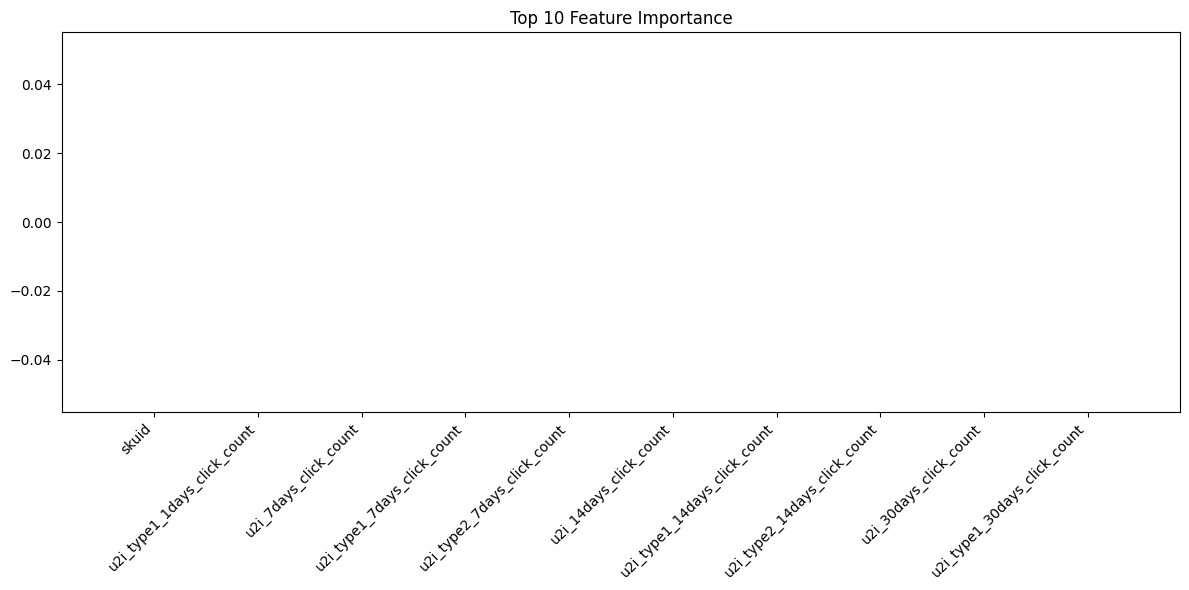

In [59]:
## 训练lgm模型
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def train_gbdt_model(df, target_col='is_click', exclude_cols=None):
    """
    训练GBDT模型
    
    参数:
    df: DataFrame - 处理后的特征数据
    target_col: str - 目标列名
    exclude_cols: list - 不作为特征的列名列表
    """
    if exclude_cols is None:
        exclude_cols = ['is_click', 'is_purchase', 'weight']
    
    # 准备特征和目标变量
    feature_cols = [col for col in df.columns if col not in exclude_cols]
    X = df[feature_cols]
    y = df[target_col]
    sample_weight = df['weight']
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
        X, y, sample_weight, test_size=0.2, random_state=42
    )
    
    # 创建LightGBM数据集
    train_data = lgb.Dataset(X_train, label=y_train, weight=w_train)
    test_data = lgb.Dataset(X_test, label=y_test, weight=w_test)
    
    # 设置模型参数
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': -1
    }
    
    # 训练模型
    print("开始训练模型...")

    from lightgbm import log_evaluation, early_stopping

    callbacks = [log_evaluation(period=100), early_stopping(stopping_rounds=50)]

    model = lgb.train(
        params,
        train_data,
        num_boost_round=1000,
        valid_sets=[train_data, test_data],
        callbacks=callbacks
        #verbose_eval=100
    )
    
    # 模型预测
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # 评估模型
    print("\n模型评估结果：")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
    # 特征重要性
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': model.feature_importance()
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    print("\n前10个最重要的特征：")
    print(feature_importance.head(10))
    
    return model, feature_importance

# 训练模型
model, feature_importance = train_gbdt_model(df_processed)

# 可视化特征重要性
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
#保存模型
model.booster_.save_model('market_gbdt_model.pkl')
#保存编码器
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# 模型服务搭建